In [ ]:
#加载数据并可视化

#建立模型 预测 
#准确率评估表现
#求边界


In [20]:
import pandas as pd
import numpy as np
data  = pd.read_csv('chip_test.csv')
data.head()

,test1,test2,pass
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,0.183760,0.93348,0


In [21]:
mask = data.loc[:,'pass']==1
print(~mask)

0      False
1      False
2      False
3      False
4       True
       ...  
113     True
114     True
115     True
116     True
117     True
Name: pass, Length: 118, dtype: bool


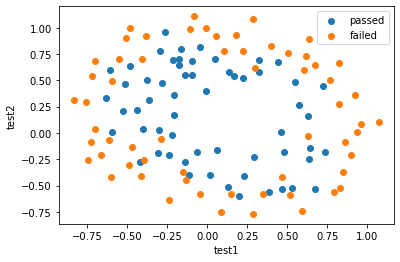

In [22]:
from matplotlib import pyplot as plt
fig1 = plt.figure()
passed = plt.scatter(data.loc[:,'test1'][mask],data.loc[:,'test2'][mask])
failed = plt.scatter(data.loc[:,'test1'][~mask],data.loc[:,'test2'][~mask])
plt.xlabel('test1')
plt.ylabel('test2')
plt.legend((passed,failed),('passed','failed'))
plt.show()

In [23]:
x = data.drop(['pass'],axis = 1)
y = data.loc[:,'pass']
x1 = data.loc[:,'test1']
x2 = data.loc[:,'test2']
x.head()

,test1,test2
0,0.051267,0.69956
1,-0.092742,0.68494
2,-0.213710,0.69225
3,-0.375000,0.50219
4,0.183760,0.93348


In [24]:
x1_2 = x1*x1
x2_2 = x2*x2
x1_x2 = x1*x2
x_new = {'x1':x1,'x2':x2,'x1_2':x1_2,'x2_2':x2_2,'x1_x2':x1_x2}
x_new = pd.DataFrame(x_new)
print(x_new)

           x1        x2      x1_2      x2_2     x1_x2
0    0.051267  0.699560  0.002628  0.489384  0.035864
1   -0.092742  0.684940  0.008601  0.469143 -0.063523
2   -0.213710  0.692250  0.045672  0.479210 -0.147941
3   -0.375000  0.502190  0.140625  0.252195 -0.188321
4    0.183760  0.933480  0.033768  0.871385  0.171536
..        ...       ...       ...       ...       ...
113 -0.720620  0.538740  0.519293  0.290241 -0.388227
114 -0.593890  0.494880  0.352705  0.244906 -0.293904
115 -0.484450  0.999270  0.234692  0.998541 -0.484096
116 -0.006336  0.999270  0.000040  0.998541 -0.006332
117  0.632650 -0.030612  0.400246  0.000937 -0.019367

[118 rows x 5 columns]


In [25]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_new,y)

LogisticRegression()

In [26]:
from sklearn.metrics import accuracy_score
y_predict = LR.predict(x_new)
accuracy = accuracy_score(y,y_predict)
print(accuracy)

0.8135593220338984


0      0.051267
1     -0.092742
2     -0.213710
3     -0.375000
4      0.183760
         ...   
113   -0.720620
114   -0.593890
115   -0.484450
116   -0.006336
117    0.632650
Name: test1, Length: 118, dtype: float64 112   -0.83007
86    -0.75518
84    -0.74366
111   -0.72638
113   -0.72062
        ...   
70     0.89804
65     0.92684
68     0.93836
67     0.96141
101    1.07090
Name: test1, Length: 118, dtype: float64
[1.19946995] 0.3501464610494275 0.6713687123833844 -2.7815298580915693 -2.3904608348076803 -0.9568611386972843
112   NaN
86    NaN
84    NaN
111   NaN
113   NaN
       ..
70    NaN
65    NaN
68    NaN
67    NaN
101   NaN
Name: test1, Length: 118, dtype: float64


F:\Anaconda3\envs\sklearn\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


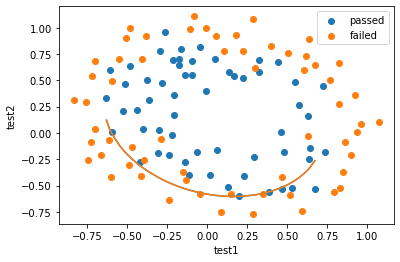

In [27]:
x1_new = x1.sort_values()
print(x1,x1_new)

theta0 = LR.intercept_
theta1,theta2,theta3,theta4,theta5 = LR.coef_[0][0],LR.coef_[0][1],LR.coef_[0][2],LR.coef_[0][3],LR.coef_[0][4]
a = theta4
b = theta5*x1_new+theta2
c = theta0+theta1*x1_new+theta3*x1_new*x1_new
x2_new_boundary = (-b+np.sqrt(b*b-4*a*c))/(2*a)
print(theta0,theta1,theta2,theta3,theta4,theta5)
print(x2_new_boundary)

fig4 = plt.figure()
plt.plot(x1_new,x2_new_boundary)
passed = plt.scatter(data.loc[:,'test1'][mask],data.loc[:,'test2'][mask])
failed = plt.scatter(data.loc[:,'test1'][~mask],data.loc[:,'test2'][~mask])#将标记取反，会自动改变颜色
plt.plot(x1_new,x2_new_boundary)
plt.xlabel('test1')
plt.ylabel('test2')
plt.legend((passed,failed),('passed','failed'))#加标记
plt.show()

In [28]:
#以函数方式求解边界曲线
def f(x):
    a = theta4
    b = theta5*x+theta2
    c = theta0+theta1*x+theta3*x*x
    x2_new_boundary1 = (-b+np.sqrt(b*b-4*a*c))/(2*a)
    x2_new_boundary2 = (-b-np.sqrt(b*b-4*a*c))/(2*a)
    return x2_new_boundary1,x2_new_boundary2

In [29]:
x2_new_boundary1 = []
x2_new_boundary2 = []
for x in x1_new :
    x2_new_boundary1.append(f(x)[0])
    x2_new_boundary2.append(f(x)[1])
print(x2_new_boundary1,x2_new_boundary2)

[array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([0.1212617]), array([0.04679448]), array([0.02697935]), array([0.00872189]), array([-0.00830576]), array([-0.00830576]), array([-0.11718731]), array([-0.16040224]), array([-0.18016521]), array([-0.18965258]), array([-0.21671004]), array([-0.22530078]), array([-0.23369452]), array([-0.2499261]), array([-0.28761583]), array([-0.30846849]), array([-0.32171919]), array([-0.32816104]), array([-0.33448523]), array([-0.34069505]), array([-0.35278365]), array([-0.35866807]), array([-0.37013014]), array([-0.42186137]), array([-0.42656594]), array([-0.43119936]), array([-0.43574686]), array([-0.44021779]), array([-0.45318277]), array([-0.47336128]), array([-0.47336128]), array([-0.48465118]), array([-0.48828317]), array([-0.49185073]), array([-0.49185073]), array([-0.51193977]), array([-0.51193977]), array([-0.5181489]), array([-0.52412149]), array([-0.52986615]), array([-0.5298

<ipython-input-28-5d1151224fea>:6: RuntimeWarning: invalid value encountered in sqrt
  x2_new_boundary1 = (-b+np.sqrt(b*b-4*a*c))/(2*a)
<ipython-input-28-5d1151224fea>:7: RuntimeWarning: invalid value encountered in sqrt
  x2_new_boundary2 = (-b-np.sqrt(b*b-4*a*c))/(2*a)


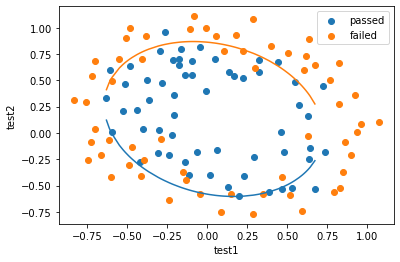

In [31]:
fig1 = plt.figure()
passed = plt.scatter(data.loc[:,'test1'][mask],data.loc[:,'test2'][mask])
failed = plt.scatter(data.loc[:,'test1'][~mask],data.loc[:,'test2'][~mask])
plt.plot(x1_new,x2_new_boundary1)
plt.plot(x1_new,x2_new_boundary2)
plt.xlabel('test1')
plt.ylabel('test2')
plt.legend((passed,failed),('passed','failed'))
plt.show()

In [36]:
#为了图像合并，要使数据更密集
x1_range = [-0.9 + x/10000 for x in range(0,19000)]
x1_range = np.array(x1_range)
x2_new_boundary1 = []
x2_new_boundary2 = []
for x in x1_range :
    x2_new_boundary1.append(f(x)[0])
    x2_new_boundary2.append(f(x)[1])
print(x2_new_boundary1,x2_new_boundary2)

<ipython-input-28-5d1151224fea>:6: RuntimeWarning: invalid value encountered in sqrt
  x2_new_boundary1 = (-b+np.sqrt(b*b-4*a*c))/(2*a)
<ipython-input-28-5d1151224fea>:7: RuntimeWarning: invalid value encountered in sqrt
  x2_new_boundary2 = (-b-np.sqrt(b*b-4*a*c))/(2*a)


[array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array

[array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array

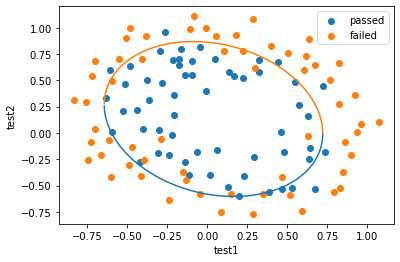

In [37]:
fig5 = plt.figure()
passed = plt.scatter(data.loc[:,'test1'][mask],data.loc[:,'test2'][mask])
failed = plt.scatter(data.loc[:,'test1'][~mask],data.loc[:,'test2'][~mask])
plt.plot(x1_range,x2_new_boundary1)
plt.plot(x1_range,x2_new_boundary2)
plt.xlabel('test1')
plt.ylabel('test2')
plt.legend((passed,failed),('passed','failed'))
plt.show()